In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential

In [2]:
# load the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory(
        'dataset/valid',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 270 images belonging to 16 classes.
Found 270 images belonging to 16 classes.


In [3]:
# create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [4]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# train the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator), 
        epochs=20,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

C:\Users\DELL\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
9/9 [==============================] - 8s 891ms/step - loss: 48.5219 - accuracy: 0.1074 - val_loss: 18.9994 - val_accuracy: 0.1593
Epoch 2/20
9/9 [==============================] - 7s 755ms/step - loss: 10.9975 - accuracy: 0.1222 - val_loss: 5.3242 - val_accuracy: 0.2037
Epoch 3/20
9/9 [==============================] - 7s 733ms/step - loss: 3.7603 - accuracy: 0.2333 - val_loss: 2.3446 - val_accuracy: 0.3333
Epoch 4/20
9/9 [==============================] - 7s 739ms/step - loss: 2.1195 - accuracy: 0.4333 - val_loss: 1.6884 - val_accuracy: 0.5556
Epoch 5/20
9/9 [==============================] - 7s 731ms/step - loss: 1.5013 - accuracy: 0.5889 - val_loss: 1.2504 - val_accuracy: 0.6259
Epoch 6/20
9/9 [==============================] - 7s 742ms/step - loss: 1.1159 - accuracy: 0.7333 - val_loss: 0.9178 - val_accuracy: 0.8296
Epoch 7/20
9/9 [==============================] - 7s 749ms/step - loss: 0.8083 - accuracy: 0.8296 - val_loss: 0.6116 - val_accuracy: 0.9074
Epoch 8/20
9/9 [=

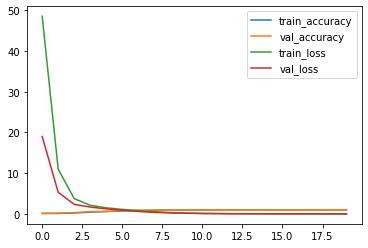

In [6]:
# plot the accuracy and loss over time
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [7]:
# evaluate the model
print("Evaluating the model on test data")
results = model.evaluate_generator(validation_generator, steps=len(validation_generator))
print("Test Loss, Test Accuracy:", results)

Evaluating the model on test data


C:\Users\DELL\Anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Loss, Test Accuracy: [0.00732388673350215, 1.0]


In [8]:
model.save("animal_disease_info.h5")

In [9]:
model = tf.keras.models.load_model('animal_disease_info.h5')

In [10]:
datas = pd.read_csv("disease_info.csv", encoding="cp1252")
datas.dropna(inplace=True)
datas

,index,disease_name,description,Possible Steps,image_url
0,0.0,Lumpy Skin Disease,Lumpy skin disease is a viral infection that ...,Possible measures to be taken include vaccina...,https://cdn.shopify.com/s/files/1/0833/1179/fi...
1,1.0,Mange,Mange is a parasitic infestation caused by mit...,Possible measures to be taken include regular ...,https://iapwa.org/wp-content/uploads/2021/06/u...
2,2.0,Ascariasis,Acariasis is a parasitic infestation caused by...,Affected animals can be treated with topical o...,https://b1791561.smushcdn.com/1791561/wp-conte...
3,3.0,Blue Tongue,Blue Tongue is a viral disease transmitted by ...,Possible measures to be taken include vaccinat...,https://www.vettimes.co.uk/app/uploads/2016/03...
4,4.0,Bovine Tuberculosis,Bovine tuberculosis is a bacterial infection t...,Possible measures to be taken include regular ...,https://www.frontiersin.org/files/MyHome%20Art...
5,5.0,Camel Pox,Camel pox is a viral infection that affects ca...,Possible measures to be taken include vaccina...,https://media.springernature.com/lw685/springe...
6,6.0,Fistulous Withers,Fistulous withers is a bacterial infection th...,Possible measures to be taken include cleaning...,https://upload.wikimedia.org/wikipedia/commons...
7,7.0,Foot and Mouth Disease,Foot and mouth disease is a viral infection t...,Possible measures to be taken include vaccina...,https://blog.apnikheti.com/wp-content/uploads/...
8,8.0,Leptospirosis,Leptospirosis is a bacterial infection that af...,Possible measures to be taken include vaccinat...,https://www.msdvetmanual.com/-/media/manual/ve...
9,9.0,Pox,Pox is a viral infection that affects various ...,Possible measures to be taken include vaccinat...,https://nivedi.res.in/Nadres_v2/images/disease...


In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from PIL import Image
def single_prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = tf.keras.preprocessing.image.img_to_array(image)
    input_data = np.expand_dims(input_data, axis=0)
    input_data = preprocess_input(input_data)
    output = model.predict(input_data)
    index = np.argmax(output)
    print("Original : ", image_path[26:-8])
    pred_csv = datas["disease_name"][index]
    print(pred_csv)
single_prediction('dataset/train/blue_tongue/blue_tongue (3).jfif')    

Original :  blue_tongue 
Blue Tongue


The prediction is: anthrax


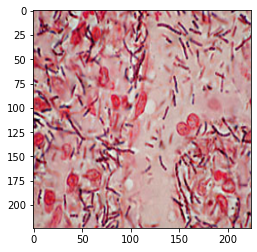

In [13]:
from PIL import Image
def single(img_path):
# load an image
 img = Image.open(img_path)
 img = img.resize((224,224))
# preprocess the image
 img = np.array(img)
 img = np.expand_dims(img, axis=0)

# make a prediction
 prediction = model.predict(img)
# decode the prediction
 label = train_generator.class_indices
 label = {v: k for k, v in label.items()}
 predicted_label_idx = np.argmax(prediction[0])
 predicted_label = label[predicted_label_idx]
 print("The prediction is:", predicted_label)
#  pred_csv = datas["disease_name"][predicted_label_idx]
 #print(label)
#  print(pred_csv)
 plt.imshow(np.squeeze(img))
 plt.show()
single('dataset/train/anthrax/ATX_003sm.jpg')